In [0]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:


from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Symbolciti.csv')

display(data.head(10))


,serial number,user id,name,user name,date,retweets,favorites,text,location,id,permalink,language
0,1,1049788797506990090,fly4dat,fly4dat,2019-05-23 04:55:47,0,1,Apart from $MS and $C bear cases.,NaN,1131340409039466496,https://twitter.com/fly4dat/status/11313404090...,en
1,2,1098372636088754176,Edmund Picks,EdmundPicks,2019-05-23 04:52:40,0,2,Cross trade ended the dilution. OTTV bounce ti...,NaN,1131339626927546370,https://twitter.com/EdmundPicks/status/1131339...,en
2,3,364589590,Exact Option Picks,ExactOptionPick,2019-05-23 04:30:48,0,0,Don't miss our next FREE OPTION TRADE. Sign u...,NaN,1131334120276205568,https://twitter.com/ExactOptionPick/status/113...,en
3,4,8041522,⛭ esoterik ⛭,d6,2019-05-23 04:26:43,4,10,this should give a histogram of all bytes: pe...,NaN,1131333093305049088,https://twitter.com/d6/status/1131333093305049088,en
4,5,1125547140045049856,Cost of Equity Capital,CostEquity,2019-05-23 03:59:33,0,0,Or is $C just seen as more reputable than $MS,NaN,1131326255784235008,https://twitter.com/CostEquity/status/11313262...,en
5,6,435617684,★ PEDRO the 3 ★,paacharon3,2019-05-23 03:46:25,0,0,"""@whenrmmtrades: I don't have $ISM or $C, just...",NaN,1131322951507349505,https://twitter.com/paacharon3/status/11313229...,en
6,7,435617684,★ PEDRO the 3 ★,paacharon3,2019-05-23 03:46:23,0,0,"""@whenrmmtrades: I don't have $ISM or $C, just...",NaN,1131322944993546240,https://twitter.com/paacharon3/status/11313229...,en
7,8,407224551,"Steve, Wise Owl",Wise_Owl_Trader,2019-05-23 03:25:37,0,0,$SPY $QQQ $NDX $DIA $IWM $NFLX $FB $INTC $SMH ...,NaN,1131317719247335426,https://twitter.com/Wise_Owl_Trader/status/113...,fi
8,9,297848618,chartseer 📈👀📉,chartseer,2019-05-23 03:23:07,1,7,Short setups $KRE $UNM $C $CMA $XOM $WRK $SLM ...,NaN,1131317090315456512,https://twitter.com/chartseer/status/113131709...,in
9,10,748817972970463232,finzine,finzine,2019-05-23 03:23:01,0,0,$C Slowdown Won't Keep Chinese From Calling Ba...,NaN,1131317063677612032,https://twitter.com/finzine/status/11313170636...,en


In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

,serial number,user id,name,user name,date,retweets,favorites,text,location,id,permalink,language,polarity
date,,,,,,,,,,,,,
2019-05-23 04:55:47,1,1049788797506990090,fly4dat,fly4dat,2019-05-23 04:55:47,0,1,Apart from $MS and $C bear cases.,NaN,1131340409039466496,https://twitter.com/fly4dat/status/11313404090...,en,0.0000
2019-05-23 04:52:40,2,1098372636088754176,Edmund Picks,EdmundPicks,2019-05-23 04:52:40,0,2,Cross trade ended the dilution. OTTV bounce ti...,NaN,1131339626927546370,https://twitter.com/EdmundPicks/status/1131339...,en,0.0000
2019-05-23 04:30:48,3,364589590,Exact Option Picks,ExactOptionPick,2019-05-23 04:30:48,0,0,Don't miss our next FREE OPTION TRADE. Sign u...,NaN,1131334120276205568,https://twitter.com/ExactOptionPick/status/113...,en,0.8306
2019-05-23 04:26:43,4,8041522,⛭ esoterik ⛭,d6,2019-05-23 04:26:43,4,10,this should give a histogram of all bytes: pe...,NaN,1131333093305049088,https://twitter.com/d6/status/1131333093305049088,en,0.0000
2019-05-23 03:59:33,5,1125547140045049856,Cost of Equity Capital,CostEquity,2019-05-23 03:59:33,0,0,Or is $C just seen as more reputable than $MS,NaN,1131326255784235008,https://twitter.com/CostEquity/status/11313262...,en,0.0000
2019-05-23 03:46:25,6,435617684,★ PEDRO the 3 ★,paacharon3,2019-05-23 03:46:25,0,0,"""@whenrmmtrades: I don't have $ISM or $C, just...",NaN,1131322951507349505,https://twitter.com/paacharon3/status/11313229...,en,0.0000
2019-05-23 03:46:23,7,435617684,★ PEDRO the 3 ★,paacharon3,2019-05-23 03:46:23,0,0,"""@whenrmmtrades: I don't have $ISM or $C, just...",NaN,1131322944993546240,https://twitter.com/paacharon3/status/11313229...,en,0.0000
2019-05-23 03:25:37,8,407224551,"Steve, Wise Owl",Wise_Owl_Trader,2019-05-23 03:25:37,0,0,$SPY $QQQ $NDX $DIA $IWM $NFLX $FB $INTC $SMH ...,NaN,1131317719247335426,https://twitter.com/Wise_Owl_Trader/status/113...,fi,0.0000
2019-05-23 03:23:07,9,297848618,chartseer 📈👀📉,chartseer,2019-05-23 03:23:07,1,7,Short setups $KRE $UNM $C $CMA $XOM $WRK $SLM ...,NaN,1131317090315456512,https://twitter.com/chartseer/status/113131709...,in,0.0000


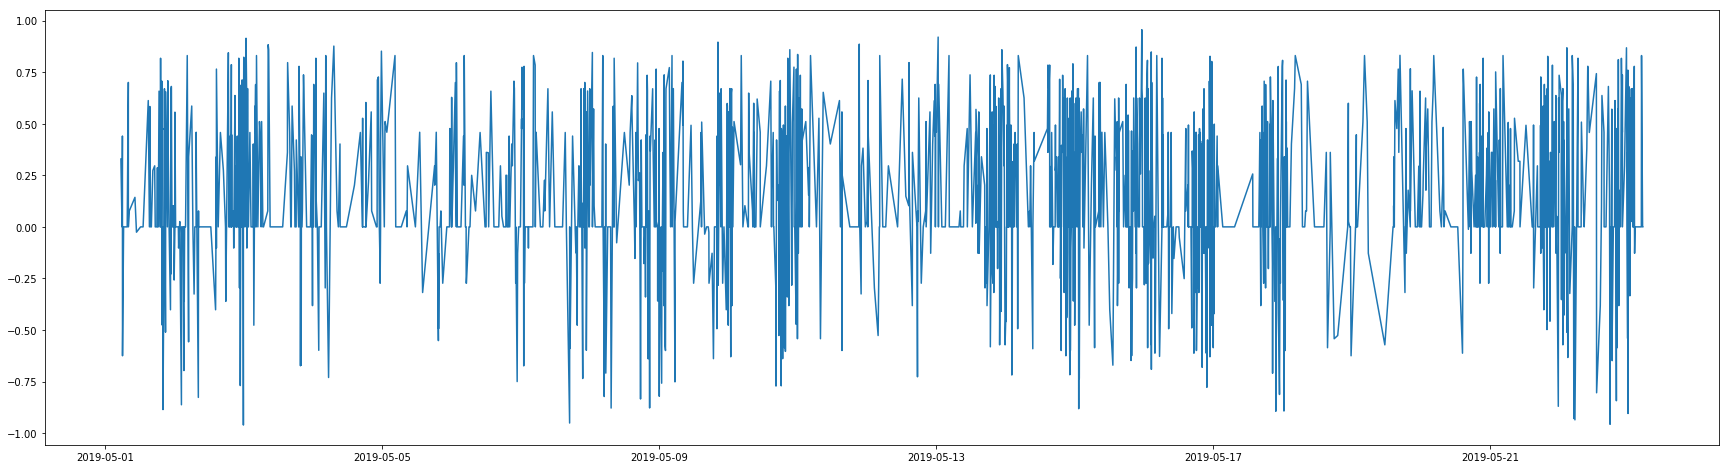

In [0]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row.values[7])
  sa = ss['compound']
  listy.append(sa)
  


se = pd.Series(listy)
data['polarity'] = se.values

#setting index as date
data[' date'] = pd.to_datetime(data[' date'],format='%Y-%m-%d %H:%M:%S')
data.index = data[' date']

display(data.head(187))

#plot
plt.figure(figsize=(30,8))
plt.plot(data['polarity'], label='Sentiment value')
plt.show()


In [0]:
neg = 0
pos = 0
neu = 0
sum1 = 0.0
sum2 = 0
sum3 = 0
for index, row in data.iterrows():
    sum3+= row['polarity']
    if row['polarity']>0 :
     pos+=1
    elif row['polarity']<0 :
     neg+=1
    else :
     neu+=1

sum1 = (pos - neg)/ (pos + neg)
sum2 = pos - neg
print(pos)
print(neg)
print(neu)
print(sum1)
print(sum2)
print(sum3)


if sum1 < 0 :
 print('bear')

else :
 print('bull')



772
284
745
0.4621212121212121
488
241.4475000000003
bull
